In [ ]:
1.pairplot 2.Rename 3.Add column 4.visualization 5.Elbow Method

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy
import seaborn

In [2]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.rename(columns={'Age': 'age', 'Annual Income (k$)' : 'income' ,'Spending Score (1-100)':'score'},inplace=True)

In [7]:
df.head()

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df=df.drop('CustomerID', axis=1)
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


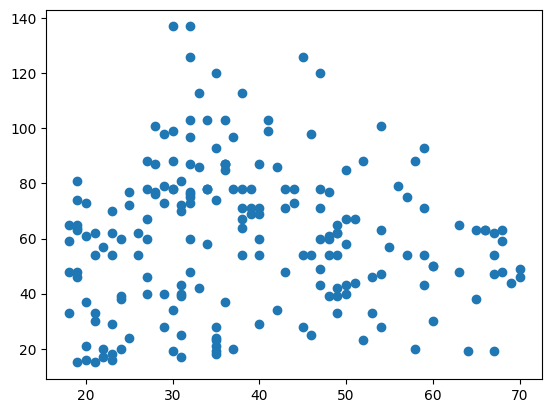

In [10]:
plt.scatter(df.age,df.income)

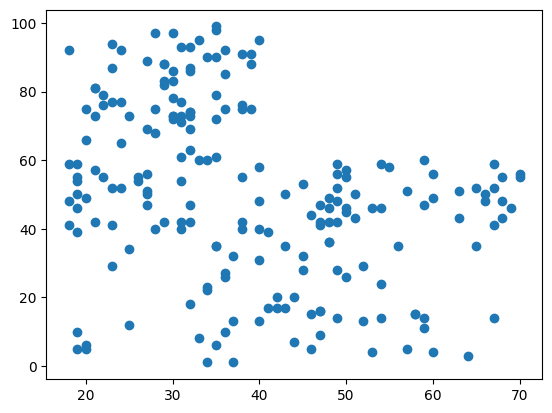

In [11]:
plt.scatter(df.age,df.score)

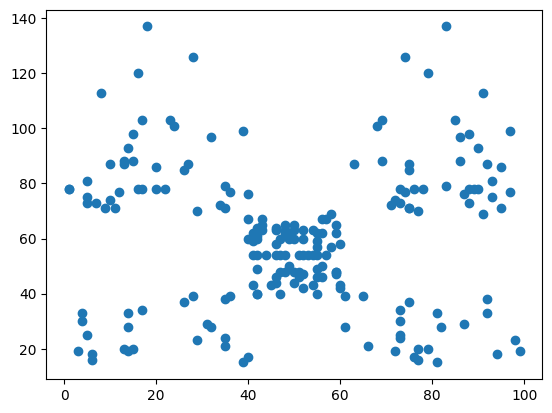

In [12]:
plt.scatter(df.score,df.income)

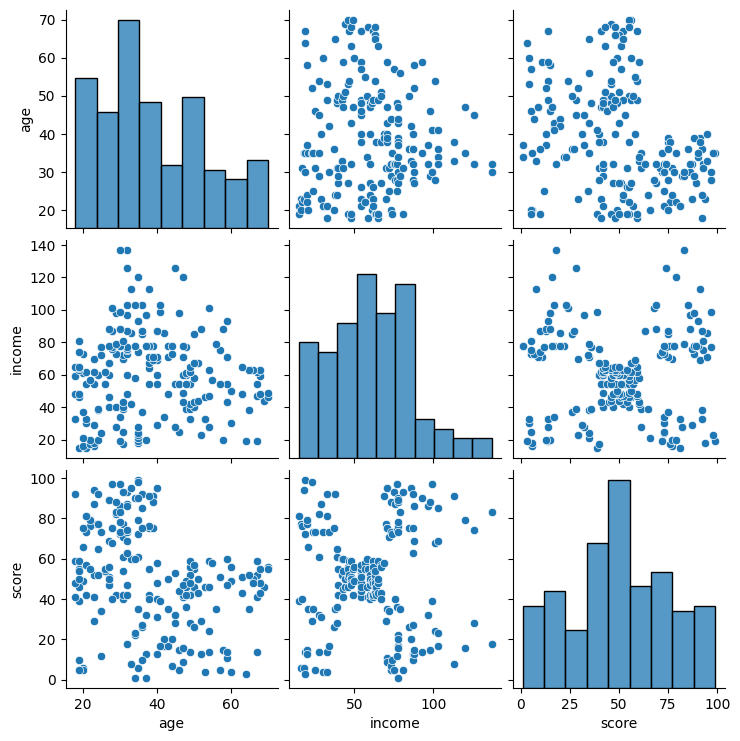

In [13]:
#pairplot
seaborn.pairplot(df[['age','income','score']])

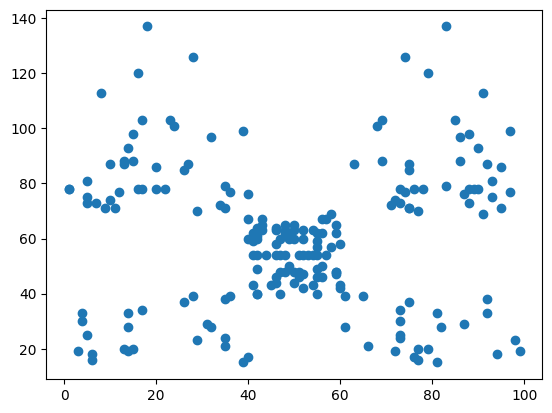

In [14]:
#any one i can select ,i select score vs income
plt.scatter(df.score,df.income)

In [15]:
import sklearn.cluster as cluster

In [16]:
kmeans = cluster.KMeans()  # n_cluster=8 default

In [17]:
# we will got 8 cluster total
predicted = kmeans.fit_predict(df[['income','score']])
predicted

C:\Users\MD.NAIM HOSSAIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 6, 2, 6, 2,
       1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 1, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5])

In [19]:
# add new column
df['predicted'] = predicted
df.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [20]:
centers = kmeans.cluster_centers_    # centroid is equal to cluster
centers

array([[ 47.72340426,  50.82978723],
       [ 64.45      ,  46.45      ],
       [ 78.03571429,  81.89285714],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [108.18181818,  82.72727273],
       [ 80.18181818,  12.68181818],
       [109.7       ,  22.        ]])

Visulize

In [21]:
# seperated cluster base on same predicted value
df0 = df[df.predicted==0]
df1 = df[df.predicted==1]
df2 = df[df.predicted==2]
df3 = df[df.predicted==3]
df4 = df[df.predicted==4]
df5 = df[df.predicted==5]
df6 = df[df.predicted==6]
df7 = df[df.predicted==7]

In [22]:
df5.head()

,Gender,age,income,score,predicted
179,Male,35,93,90,5
181,Female,32,97,86,5
183,Female,29,98,88,5
185,Male,30,99,97,5
187,Male,28,101,68,5


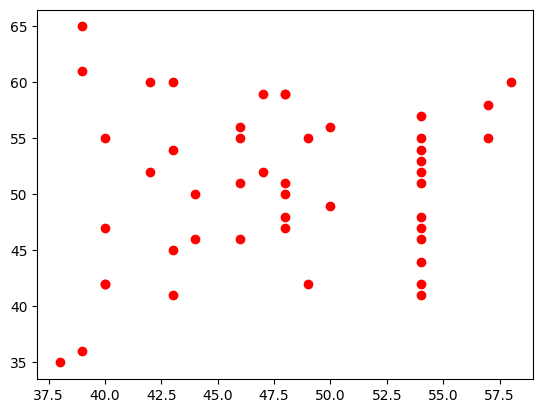

In [24]:
# show 0 cluster value
plt.scatter(df0.income ,df0.score, color = 'red', label = 'cluster_0')

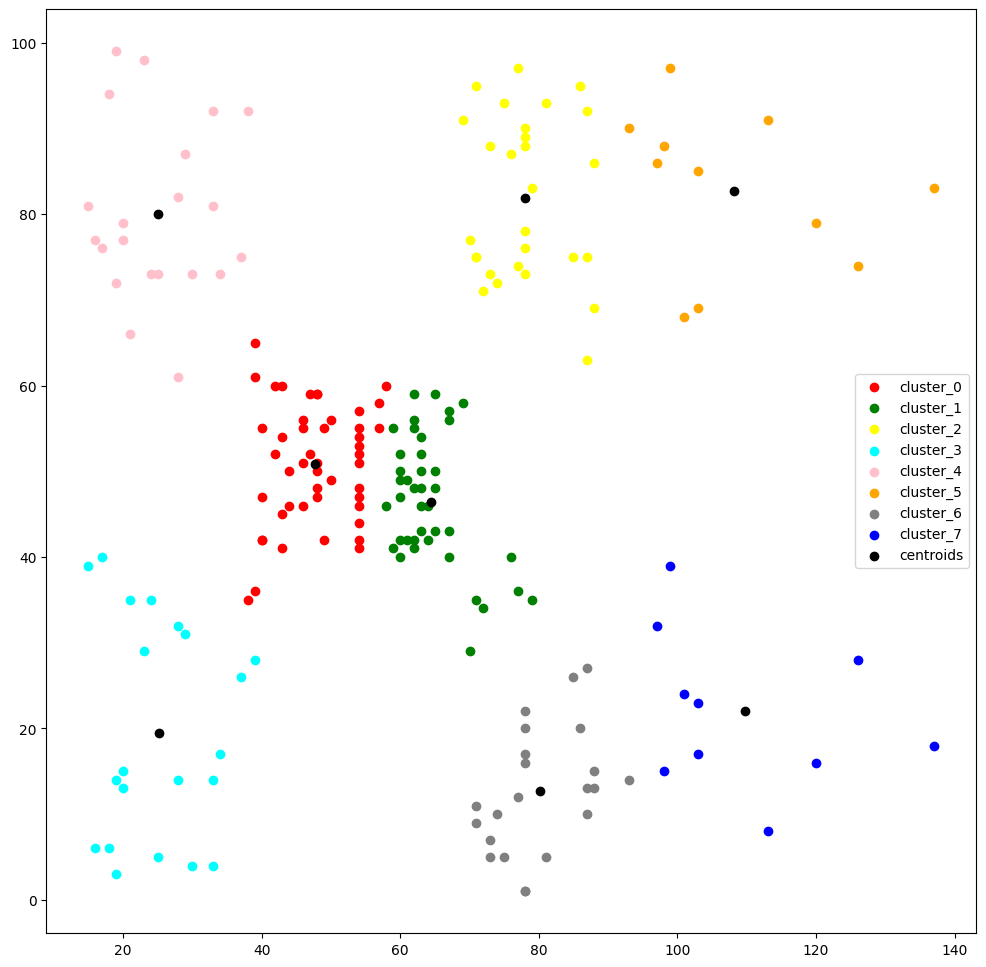

In [34]:
# all are together
plt.figure(figsize=(12,12))
plt.scatter(df0.income ,df0.score, color = 'red', label = 'cluster_0')
plt.scatter(df1.income ,df1.score, color = 'green', label = 'cluster_1')
plt.scatter(df2.income ,df2.score, color = 'yellow', label = 'cluster_2')
plt.scatter(df3.income ,df3.score, color = 'cyan', label = 'cluster_3')
plt.scatter(df4.income ,df4.score, color = 'pink', label = 'cluster_4')
plt.scatter(df5.income ,df5.score, color = 'orange', label = 'cluster_5')
plt.scatter(df6.income ,df6.score, color = 'gray', label = 'cluster_6')
plt.scatter(df7.income ,df7.score, color = 'blue', label = 'cluster_7')

plt.scatter(centers[:,0],centers[:,1], color='black',label='centroids') # [:,0] all row(:) and 0 colum
plt.legend()

#Elbo Method

In [41]:
wcss =[] #WCSS is the sum of the squared distance between each point and the centroid in a cluster.
clstr = range(1,15)

for k in clstr:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['score','income']])
    wcss.append(km.inertia_) #sum of square distance

C:\Users\MD.NAIM HOSSAIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MD.NAIM HOSSAIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MD.NAIM HOSSAIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MD.NAIM HOSSAIN\AppData\Local\Programs\Python\Pyt

In [42]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25022.48500453035,
 21829.13563877983,
 19775.976231256747,
 17884.88512108047,
 16201.808066005411,
 14400.409317219423,
 12882.60971404482]

Text(0, 0.5, 'sum of clusters')

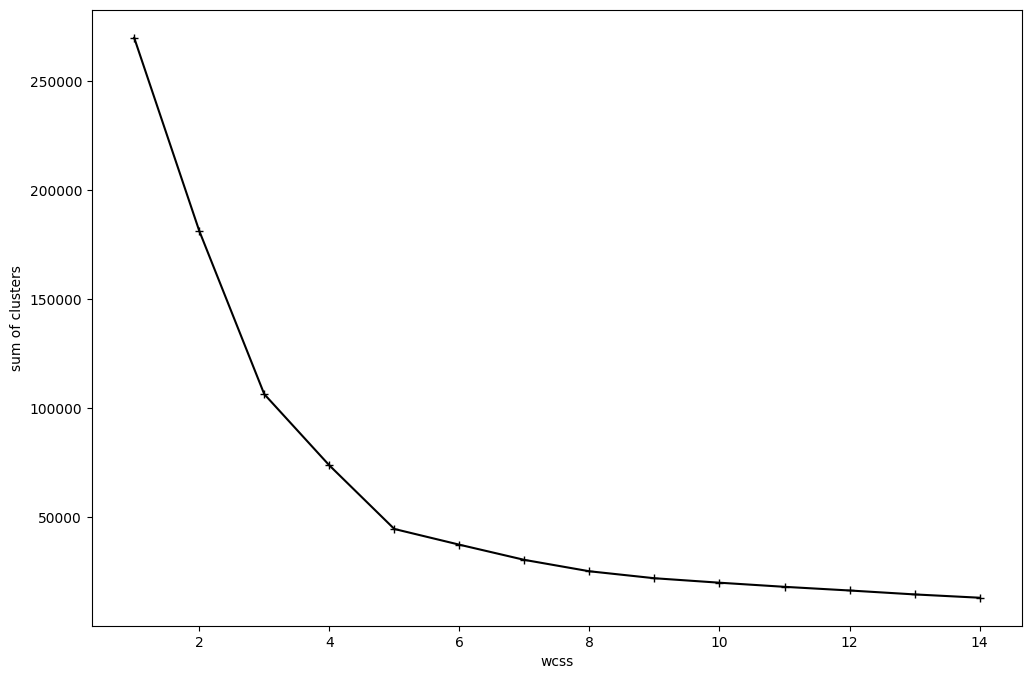

In [45]:
plt.figure(figsize=(12,8))
plt.plot(clstr,wcss, marker ='+' , color= 'black')
plt.xlabel('wcss')
plt.ylabel('sum of clusters')
         

In [51]:
#plot knee
from kneed import KneeLocator
kn= KneeLocator(clstr,wcss,curve='convex',direction = 'decreasing')

In [52]:
kn

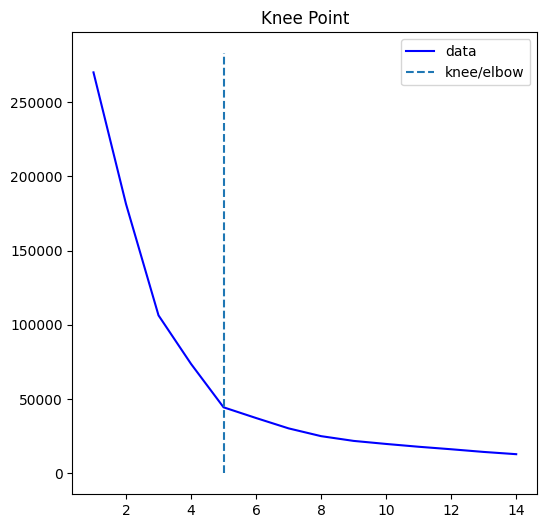

In [53]:
kn.plot_knee()

In [54]:
kn.knee

5

After Elbow

In [57]:
kmeans2 = cluster.KMeans(n_clusters = 5)
predicted = kmeans2.fit_predict(df[['income','score']])
df['predicted']=predicted
df.head()

C:\Users\MD.NAIM HOSSAIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Gender,age,income,score,predicted
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [60]:
centers2 = kmeans2.cluster_centers_

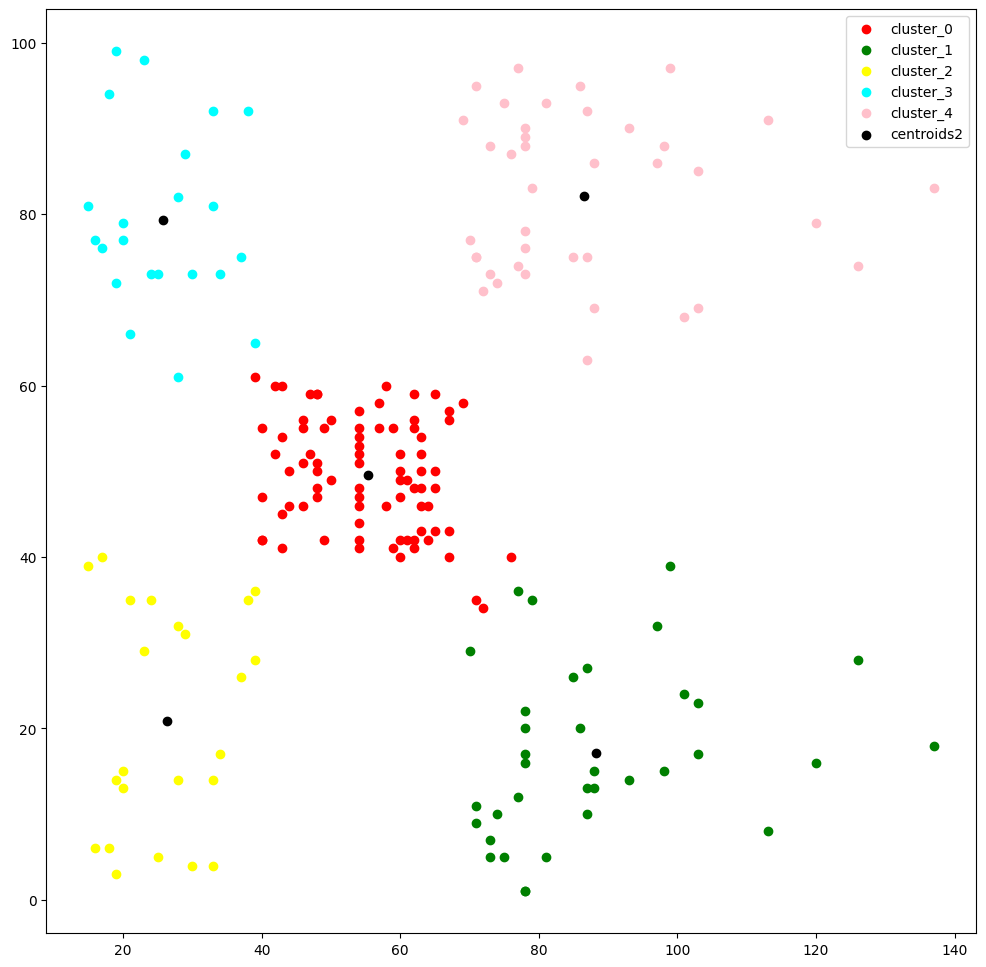

In [62]:
df0 = df[df.predicted==0]
df1 = df[df.predicted==1]
df2 = df[df.predicted==2]
df3 = df[df.predicted==3]
df4 = df[df.predicted==4]

plt.figure(figsize=(12,12))
plt.scatter(df0.income ,df0.score, color = 'red', label = 'cluster_0')
plt.scatter(df1.income ,df1.score, color = 'green', label = 'cluster_1')
plt.scatter(df2.income ,df2.score, color = 'yellow', label = 'cluster_2')
plt.scatter(df3.income ,df3.score, color = 'cyan', label = 'cluster_3')
plt.scatter(df4.income ,df4.score, color = 'pink', label = 'cluster_4')

plt.scatter(centers2[:,0],centers2[:,1], color='black',label='centroids2') # [:,0] all row(:) and 0 colum
plt.legend()